# Pre processamento dos dados

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [6]:
dataset_path = "data" #carregando o dataset

train_dataset = image_dataset_from_directory(
    f"{dataset_path}/training_set", #dados de treino
    image_size=(128, 128),
    batch_size=32,
    label_mode="binary"
)

validation_dataset = image_dataset_from_directory(
    f"{dataset_path}/test_set", #dados de teste
    image_size=(128, 128),
    batch_size=32,
    label_mode="binary"
)

Found 196 files belonging to 2 classes.
Found 73 files belonging to 2 classes.


In [7]:
#normalizando os dados (para valores entre 0 e 1)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

# Estrutura da CNN

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3))) #primeira camada
model.add(MaxPooling2D(pool_size=(2, 2)))

c:\Users\sophi\miniconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(128, (3, 3), activation='relu')) #segunda camada
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Conv2D(128, (3, 3), activation='relu')) #terceira camada
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
model.add(Flatten()) #flattening

In [13]:
model.add(Dense(units=256, activation='relu')) #camada densa
model.add(Dropout(0.5))  # dropout
model.add(Dense(units=1, activation='sigmoid'))

In [14]:
#compilando o modelo
model.compile(optimizer=Adam(learning_rate=0.001), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [15]:
model.summary() #sumarizando o modelo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,646,273 (25.35 MB)

 Trainable params: 6,646,273 (25.35 MB)

 Non-trainable params: 0 (0.00 B)

# Treinamento do Modelo

In [16]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - accuracy: 0.4914 - loss: 1.1676 - val_accuracy: 0.5753 - val_loss: 0.6908
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 0.5860 - loss: 0.6916 - val_accuracy: 0.5753 - val_loss: 0.6430
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.6370 - loss: 0.6289 - val_accuracy: 0.6164 - val_loss: 0.6361
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - accuracy: 0.6922 - loss: 0.6026 - val_accuracy: 0.7671 - val_loss: 0.5013
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.6796 - loss: 0.5403 - val_accuracy: 0.7945 - val_loss: 0.3519
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - accuracy: 0.8550 - loss: 0.3830 - val_accuracy: 0.8767 - val_loss: 0.2998
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step - accuracy: 0.8408 - loss: 0.3680 - val_accuracy: 0.7260 - val_loss: 0.4604
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.7703 - loss: 0.4290 - val_accuracy: 0.8082 - val_loss:

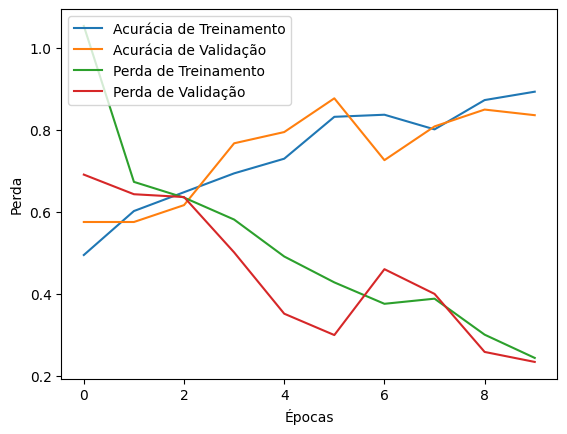

In [17]:
#plot dos resultados (curvas de acuracia e perda)
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

In [26]:
loss, accuracy = model.evaluate(validation_dataset)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8084 - loss: 0.2513
Model Accuracy: 83.56%


In [28]:
print("Training Accuracy: ", history.history['accuracy'])
print("Validation Accuracy: ", history.history['val_accuracy'])

print("Training Loss: ", history.history['loss'])
print("Validation Loss: ", history.history['val_loss'])

Training Accuracy:  [0.4948979616165161, 0.6020408272743225, 0.6479591727256775, 0.6938775777816772, 0.7295918464660645, 0.831632673740387, 0.8367347121238708, 0.8010203838348389, 0.8724489808082581, 0.8928571343421936]
Validation Accuracy:  [0.5753424763679504, 0.5753424763679504, 0.6164383292198181, 0.767123281955719, 0.7945205569267273, 0.8767123222351074, 0.7260273694992065, 0.8082191944122314, 0.8493150472640991, 0.835616409778595]
Training Loss:  [1.0531353950500488, 0.6730931997299194, 0.6348484754562378, 0.5812897682189941, 0.49127325415611267, 0.4281875491142273, 0.37599536776542664, 0.3884885609149933, 0.3007926642894745, 0.24412155151367188]
Validation Loss:  [0.6908343434333801, 0.643008291721344, 0.6361475586891174, 0.5013002753257751, 0.3518683910369873, 0.2998332977294922, 0.4603630006313324, 0.4001469612121582, 0.2586929202079773, 0.23437027633190155]


# Teste do Modelo

In [21]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from PIL import Image
import numpy as np

In [22]:
img = Image.open("data/test_set/classe_bart/bart17.bmp").resize((128, 128)) #imagem exemplo para teste
img_array = np.array(img) / 255.0  # normalizando os valores
img_array = np.expand_dims(img_array, axis=0)  #expandindo dimensões

In [24]:
#predicao
prediction = model.predict(img_array)
print("Predição:", "Homer" if prediction[0][0] > 0.5 else "Bart")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predição: Bart


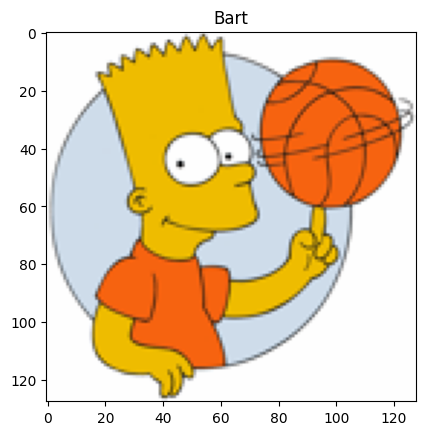

In [25]:
plt.imshow(img)
plt.title("Homer" if prediction[0][0] > 0.5 else "Bart")
plt.show()